<a href="https://colab.research.google.com/github/RaniaDjeridi/C-_projet/blob/main/Copie_de_Projet_I3_Afek_Amiri_Ghada_Amakrane_Rania_Djeridi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 14.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pycountry
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload() # cliquer sur Sélect. fichiers

Saving avgIQpercountry.csv to avgIQpercountry.csv


In [ ]:
file_name = 'avgIQpercountry.csv'
df = pd.read_csv("avgIQpercountry.csv")

In [ ]:
df

,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population - 2023
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,123294513
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,10143543
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6014723
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7491609
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1425671352
...,...,...,...,...,...,...,...,...,...,...
188,189,Gambia,52.68,Africa,0.58,0,0.500,4.6,2172.0,2773168
189,190,Guatemala,47.72,Central America,0.79,2,0.627,5.7,8723.0,18092026
190,191,Liberia,45.07,Africa,0.48,2,0.481,5.1,1289.0,5418377
191,192,Sierra Leone,45.07,Africa,0.48,0,0.477,4.6,1622.0,8791092


In [ ]:
df = df.rename(columns={'Nobel Prices': 'Nobel Prizes','HDI (2021)':'HDI - 2021', ' GNI - 2021':'GNI - 2021'}) # renommer certaines colonnes

In [ ]:
df

,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prizes,HDI - 2021,Mean years of schooling - 2021,GNI - 2021,Population - 2023
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,123294513
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,10143543
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6014723
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7491609
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1425671352
...,...,...,...,...,...,...,...,...,...,...
188,189,Gambia,52.68,Africa,0.58,0,0.500,4.6,2172.0,2773168
189,190,Guatemala,47.72,Central America,0.79,2,0.627,5.7,8723.0,18092026
190,191,Liberia,45.07,Africa,0.48,2,0.481,5.1,1289.0,5418377
191,192,Sierra Leone,45.07,Africa,0.48,0,0.477,4.6,1622.0,8791092


# Objectif :
- Comprendre du mieux possible nos données
- Développer une premiere stratégie de modélisation

## Checklist de base
#### Analyse de Forme :
- **Variable target** : Average IQ
- **Lignes et colonnes** : 192 pays et 9 variables
- **Types de variables** : qualitatives :2, quantitatives :7
- **Analyse des valeurs manquantes** : Très peu de Nan (3 variables 7.25% de NaN)

#### Analyse de Fond :
- **Visualisation géographique de la target**
    - L'Europe, l'Amérique du nord, la Chine, le Japon, l'Australie ont les niveaux de IQ les plus élevés.
    - L'Afrique en jaune/orange.
    
    
    
- **Signification des variables** :
    - Variables continues non standardisées. Certaines s'approchent d'une distribution normale (Average IQ, HDI et MYS), d'autres sont asymétriques (GNI et Nobel prizes)
    - Variables discrètes : Rank (décroissant en focntion du AVG IQ) et Nobel prizes.



- **Relation Variables / Target** :
    - HDI, Mean Years of schooling : Nuages de points dispersé, correlations positives.
    - GNI : Nuage de points plutot condensé. Correlation positive.  
    - Nobel prizes : ligne verticale => variable non significative
    - Litteracy rate : Nuage de points dispersé. Lignes verticales pour les forts taux.
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :
    - HDI et MYS sont fortement corrélées (coeff de correlation 0.91).
    - Toutes les correlations sont positives exception faite pour les correlations avec le rang.
- **Choix des variables significatives** :
    - On remarque que Average IQ dépend fortement et positivement de HDI: Human Development Index et de MYS. Il dépend également de GNI: Gross National Income. Cette dépendance est également positive mais elle est moins importante.
    - Graphe à bulle de Average IQ en fonction de HDI et MYS.

   

In [ ]:
df.columns

Index(['Rank', 'Country', 'Average IQ', 'Continent', 'Literacy Rate',
       'Nobel Prizes', 'HDI - 2021', 'Mean years of schooling - 2021',
       'GNI - 2021', 'Population - 2023'],
      dtype='object')

In [ ]:
df.shape # 9 variables et 192 pays

(193, 10)

In [ ]:
df.dtypes.value_counts()

float64    5
object     3
int64      2
dtype: int64

<Axes: >

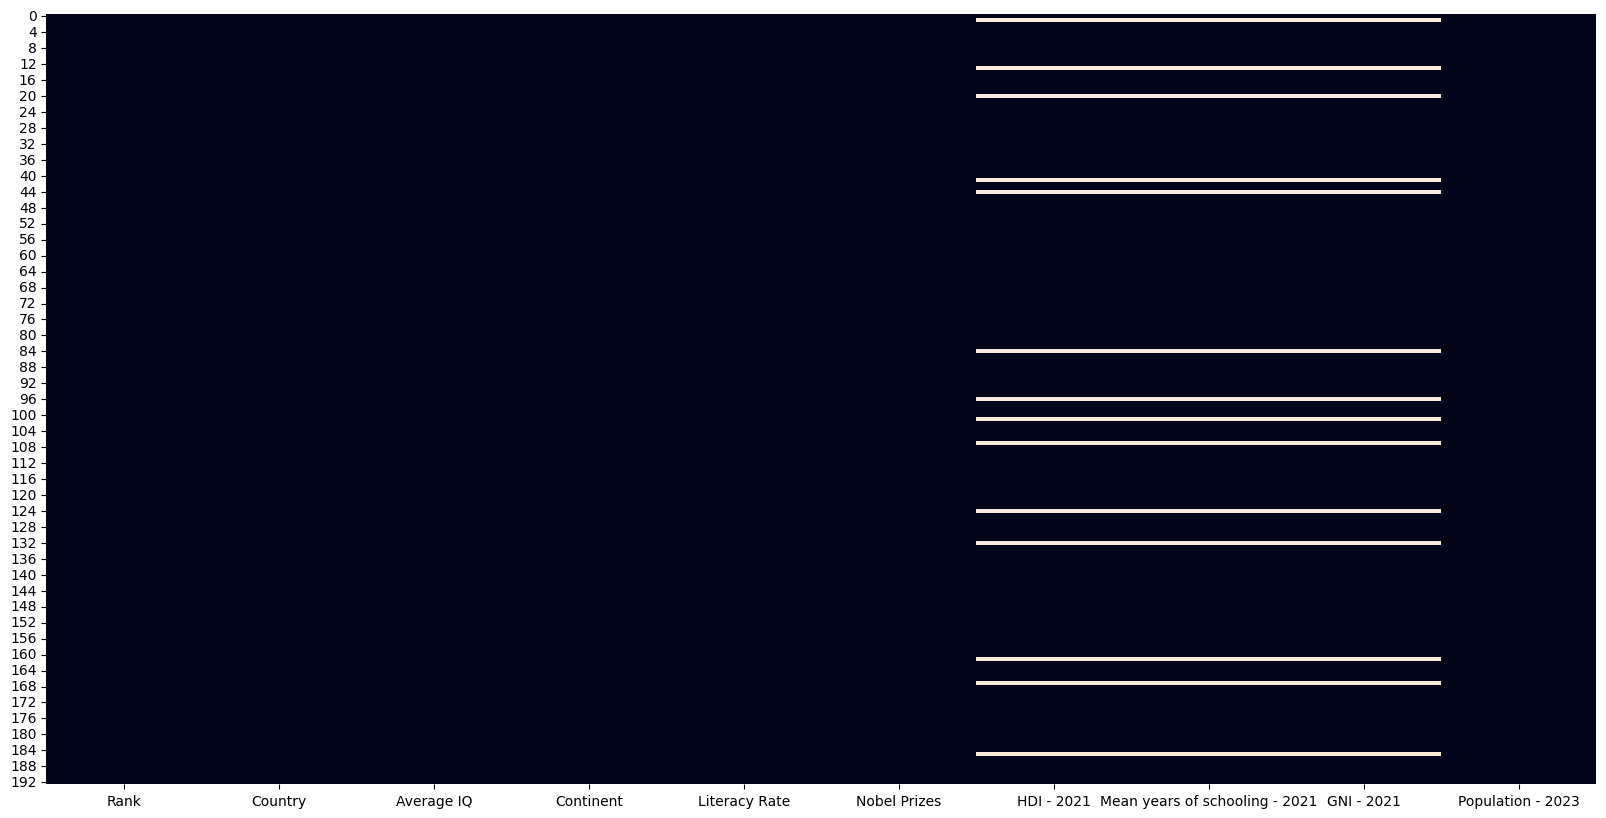

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False) # pour visualiser les valeurs manquantes

In [ ]:
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=True) # pourcentage des valeurs manquantes par variable

Rank                              0.000000
Country                           0.000000
Average IQ                        0.000000
Continent                         0.000000
Literacy Rate                     0.000000
Nobel Prizes                      0.000000
Population - 2023                 0.000000
HDI - 2021                        7.253886
Mean years of schooling - 2021    7.253886
GNI - 2021                        7.253886
dtype: float64

## Analyse du Fond
### 1. Visulation géographique

In [ ]:
# Afficher la liste des noms de pays dans pycountry
countries_names = [country.name for country in pycountry.countries]
for country in countries_names:
  print(country)

Aruba
Afghanistan
Angola
Anguilla
Åland Islands
Albania
Andorra
United Arab Emirates
Argentina
Armenia
American Samoa
Antarctica
French Southern Territories
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Bonaire, Sint Eustatius and Saba
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas
Bosnia and Herzegovina
Saint Barthélemy
Belarus
Belize
Bermuda
Bolivia, Plurinational State of
Brazil
Barbados
Brunei Darussalam
Bhutan
Bouvet Island
Botswana
Central African Republic
Canada
Cocos (Keeling) Islands
Switzerland
Chile
China
Côte d'Ivoire
Cameroon
Congo, The Democratic Republic of the
Congo
Cook Islands
Colombia
Comoros
Cabo Verde
Costa Rica
Cuba
Curaçao
Christmas Island
Cayman Islands
Cyprus
Czechia
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
Ecuador
Egypt
Eritrea
Western Sahara
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Islands (Malvinas)
France
Faroe Islands
Micronesia, Federated States of
Gabon
United Kingdom
Georgia
Guernsey
Ghana
Gibraltar
Gui

In [ ]:
# Les noms des pays de notre dataset qui ont des noms différents de ceux de pycountry
for country in df['Country']:
  if not country in countries_names:
    print (country)


Taiwan
South Korea
North Korea
Russia
Czech republic
Moldavia
Vietnam
Brunei
Federated States of Micronesia
Venezuela
Laos
Iran
Grenade
East Timor
Palestine
British Virgin Islands
Bolivia
Tanzania
Syria
Saint Helena
Congo Republic
Costa do Marfim


In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

IQ_location = df[['Country', 'Average IQ']]
IQ_location['Country'] = IQ_location['Country'].replace({'Russia': 'Russian Federation','Taiwan':'Taiwan, Province of China', 'South Korea':"Korea, Democratic People's Republic of","North Korea":"Korea, Democratic People's Republic of",'Czech republic':'Czechia','Vietnam':'Viet Nam','Brunei':'Brunei Darussalam','Federated States of Micronesia':'Micronesia, Federated States of','Venezuela':'Venezuela, Bolivarian Republic of','Laos':"Lao People's Democratic Republic",'Iran':'Iran, Islamic Republic of','Grenade':'Grenada','East Timor':'Timor-Leste','Palestine':'Palestine, State of','British Virgin Islands':'Virgin Islands, British','Bolivia':'Bolivia, Plurinational State of','Tanzania':'Tanzania, United Republic of','Syria':'Syrian Arab Republic','Saint Helena':'Saint Helena, Ascension and Tristan da Cunha','Congo Republic':'Congo, The Democratic Republic of the','Costa do Marfim':"Côte d'Ivoire"})
# corriger les noms


IQ_location['ISO_alpha'] = IQ_location['Country'].apply(lambda x: pycountry.countries.get(name=x).alpha_3 if pycountry.countries.get(name=x) else None)

merged_data = world.merge(IQ_location, how='left', left_on='iso_a3', right_on='ISO_alpha')

fig = px.choropleth(
    merged_data,
    locations='iso_a3',
    color='Average IQ',
    color_continuous_scale='YlOrRd',
    labels={'Average IQ': 'Average IQ'},
    title='Average IQ by Country'
)

fig.show()

<ipython-input-30-d58c3de7c80d>:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

<ipython-input-30-d58c3de7c80d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-d58c3de7c80d>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###2. Classement mondial

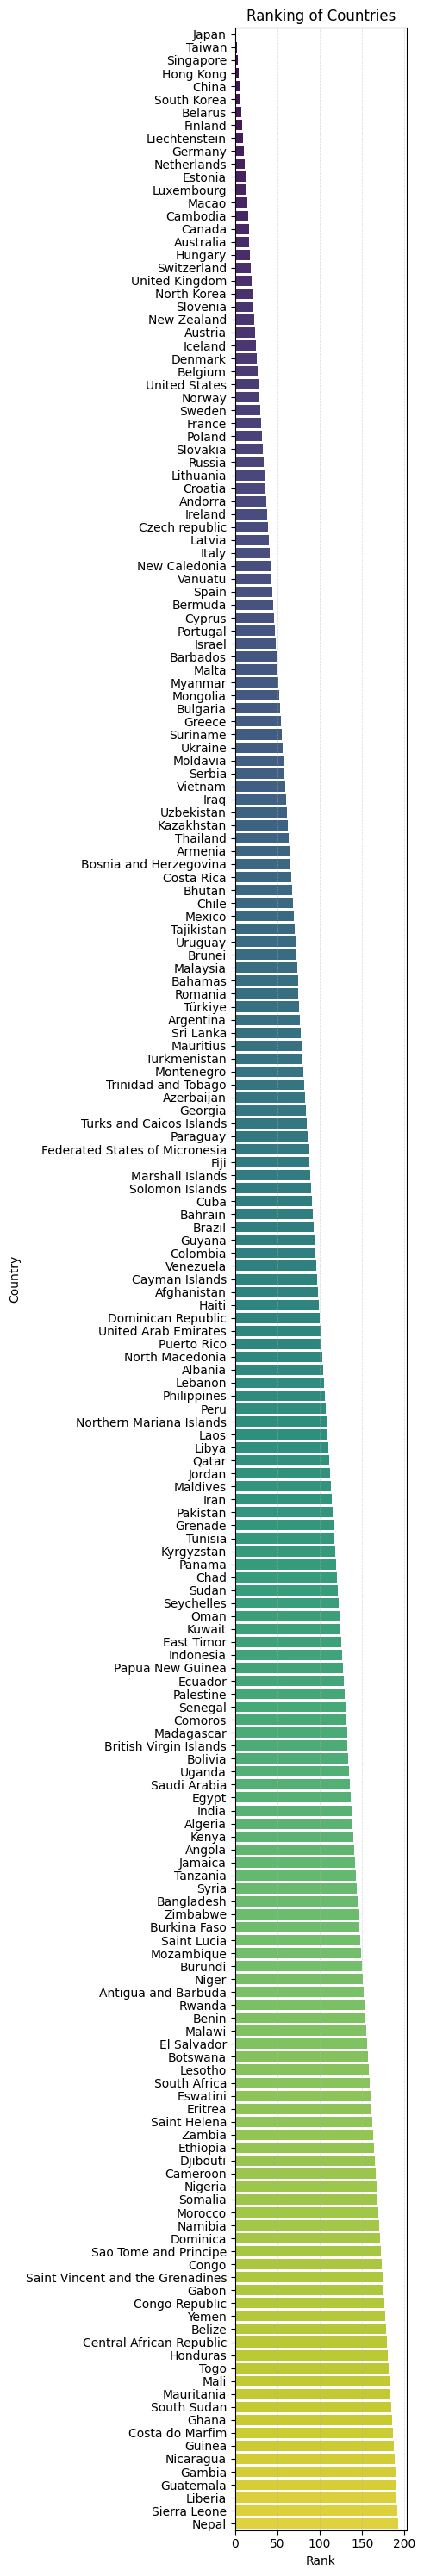

In [ ]:
rank_by_country = df.sort_values(by='Rank', ascending=True)

plt.figure(figsize=(5, 30))
sns.barplot(x='Rank', y='Country', data=rank_by_country, palette='viridis')

plt.title('Ranking of Countries')
plt.xlabel('Rank')
plt.ylabel('Country')

# niveaux
plt.xticks([0, 50, 100, 150, 200])

# Prolonger les niveaux jusqu'au début du graphique
plt.gca().xaxis.grid(True, linestyle='--', alpha=0.5, linewidth=0.5)

# Ajustement automatique de l'espacement
plt.tight_layout()

plt.show()

### 3. Average IQ by continent

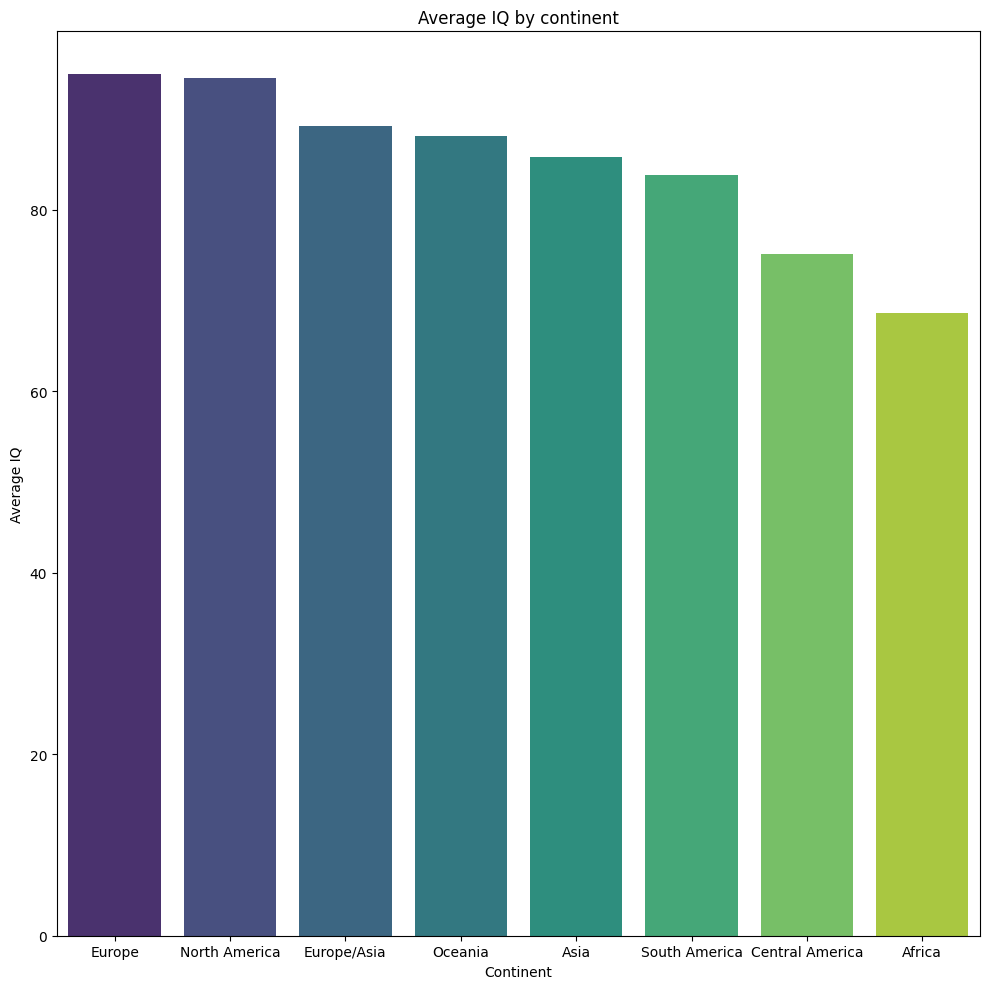

In [ ]:
average_iq_by_continent = df.groupby(['Continent'])[['Average IQ']].mean().reset_index()
average_iq_by_continent = average_iq_by_continent.sort_values(by='Average IQ', ascending=False)
plt.figure(figsize=(10, 10))
sns.barplot(x='Continent', y='Average IQ', data=average_iq_by_continent, palette='viridis')

plt.title('Average IQ by continent')
plt.xlabel('Continent')
plt.ylabel('Average IQ')

# Ajustement automatique de l'espacement
plt.tight_layout()


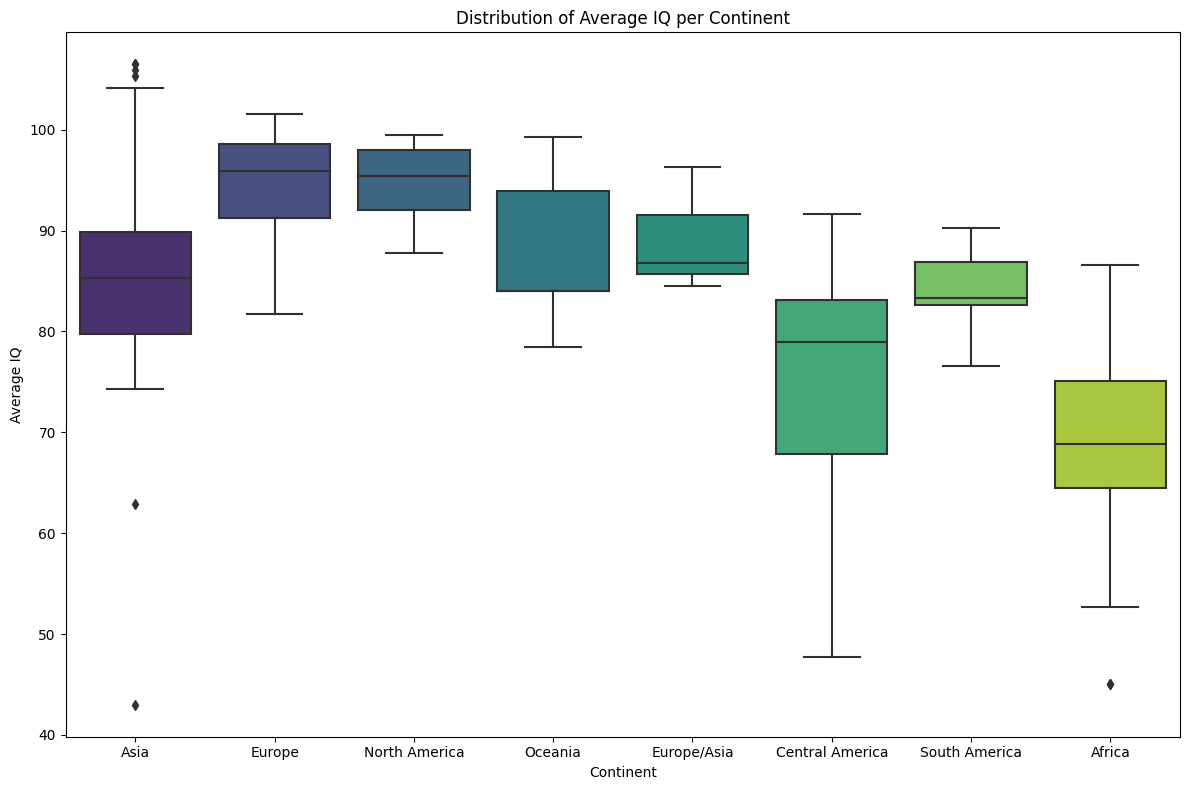

In [ ]:
# Créer un boxplot avec Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Continent', y='Average IQ', data=df, palette='viridis')

# Ajouter un titre
plt.title('Distribution of Average IQ per Continent')

# Ajustement automatique de l'espacement
plt.tight_layout()

# Afficher le graphique
plt.show()

- Pour l'Asie et l'Afrique on a des points aberrants (les losanges qui dépassent l'écart inter-quartile).
- Les moustaches sont symétriques pour l'Afrique et l'Océanie : signe d'homogéniété.
- Pas de médiane pour l'Océanie (Contient un seul pays qui est l'Australie).
- Asie: boxe symétrique de part et d'autre de la médiane.
- Une grande dispersion en Amérique centrale (de longues moustaches), une dispersion moins importante dans l'Afrique et l'Asie.

### Examen des colonnes

### histogrames des variables continues

<ipython-input-63-77e513498f93>:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-63-77e513498f93>:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-63-77e513498f93>:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

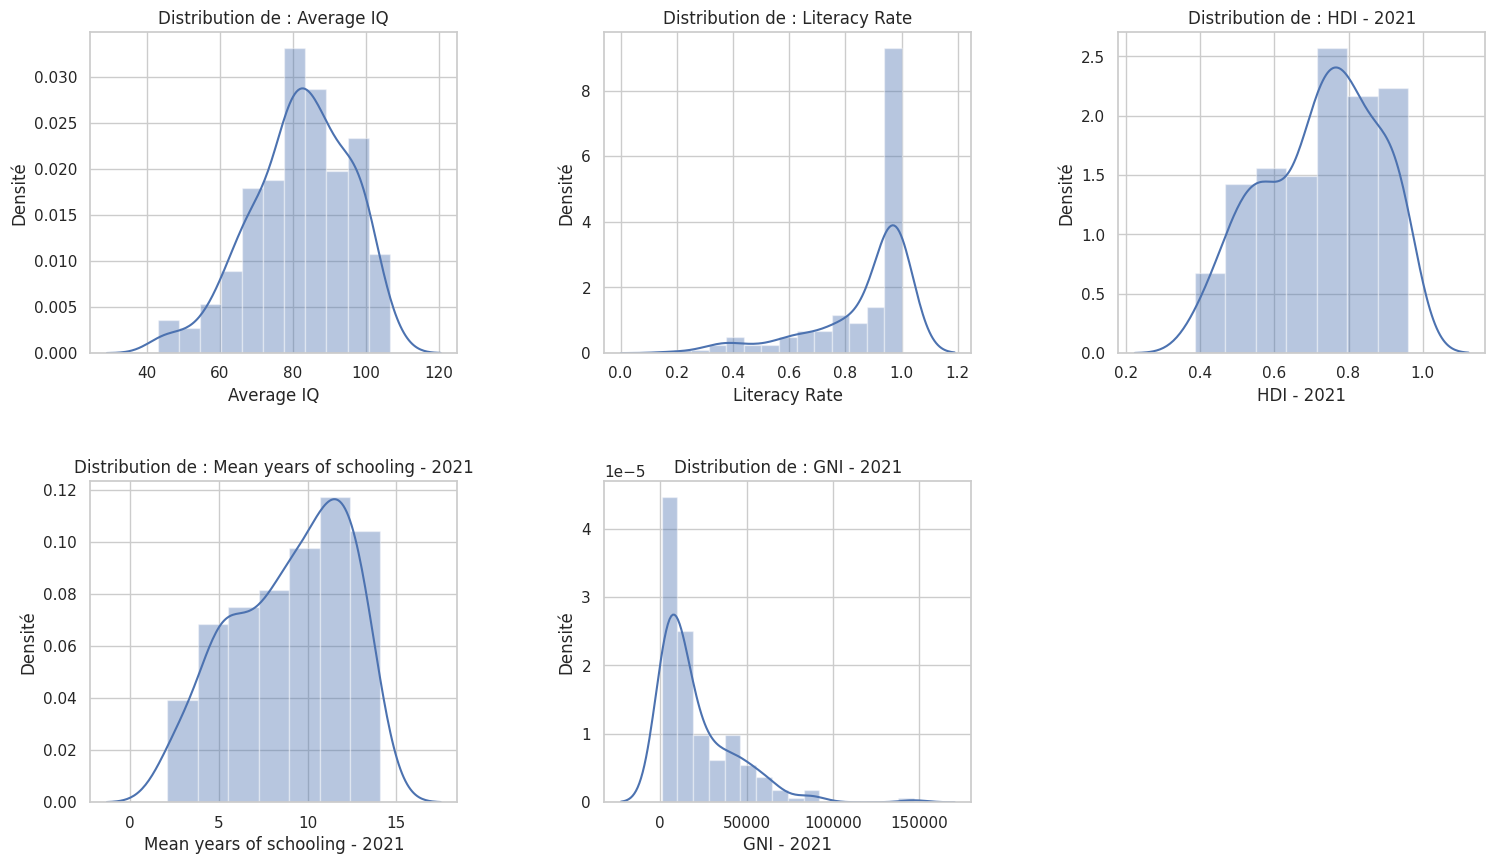

In [ ]:
# Sélectionner les colonnes de type float
variables_continues = df.select_dtypes('float').columns
# Définir le style des graphiques
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
# Ajuster l'espacement entre les graphiques
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Boucle à travers les colonnes pour créer les graphiques
for i, column in enumerate(variables_continues):
    row = i // 3
    col = i % 3
    sns.distplot(df[column],ax=axes[row, col])
    axes[row, col].set_title(f'Distribution de : {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Densité')
# Masquer le graphique vide
fig.delaxes(axes.flatten()[5])


# Afficher la figure
plt.show()




Avec un peu de scaling, on peut s'approcher d'une loi normale pour Average IQ, HDI et MYS. Cependant GNI et Nobel prizes ont des distributions dissymétriques (l'une à gauche, l'autre à droite)

### Relations univariables avec la variable target

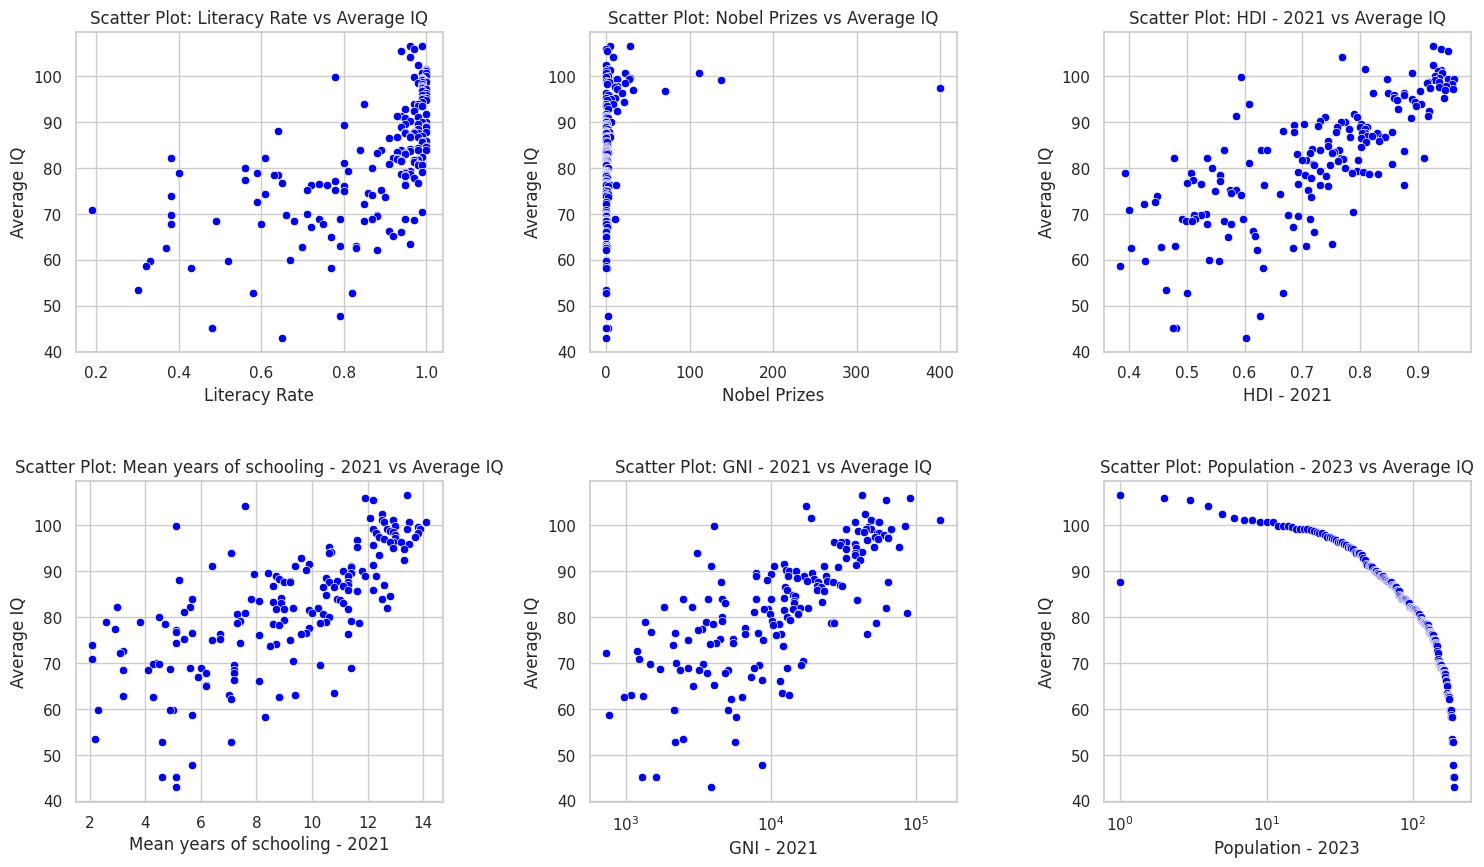

In [ ]:
# Liste des colonnes à visualiser
columns = ['Literacy Rate', 'Nobel Prizes', 'HDI - 2021',
           'Mean years of schooling - 2021', 'GNI - 2021', 'Population - 2023']

# Définir le style des graphiques
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Ajuster l'espacement entre les graphiques
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Boucle à travers les colonnes pour créer les graphiques
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    sns.scatterplot(x=column, y='Average IQ', data=df, color='blue', ax=axes[row, col])
    axes[row, col].set_title(f'Scatter Plot: {column} vs Average IQ')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Average IQ')
    if column == 'Population - 2023' or column == 'GNI - 2021':
        # Utiliser une échelle logarithmique sur l'axe x
        axes[row, col].set_xscale('log')

# Afficher la figure
plt.show()


In [ ]:
df.loc[df['Nobel Prizes'] == 400, 'Country']

27    United States
Name: Country, dtype: object

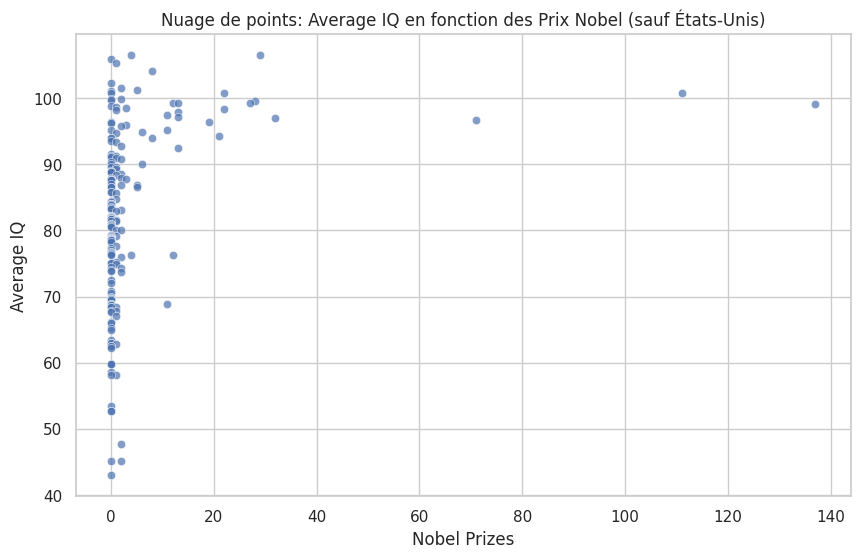

In [ ]:
# Filtrer les données pour exclure les États-Unis
df_no_us = df[df['Country'] != 'United States']

# Créer un nuage de points avec seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Nobel Prizes', y='Average IQ', data=df_no_us, alpha=0.7)

# Ajouter des étiquettes et un titre
plt.xlabel('Nobel Prizes')
plt.ylabel('Average IQ')
plt.title('Nuage de points: Average IQ en fonction des Prix Nobel (sauf États-Unis)')

# Afficher le graphique
plt.show()

- HDI : Nuage de points dispersé, correlation positive.   
- Mean Years of schooling : Nuage de points dispersé, correlation positive.
- GNI : Nuage de points plutot condensé. Correlation positive.  
- Nobel prizes : ligne verticale => variable non significative (A vérifier). USA 400 prix Nobel (valeur aberrante). Même après l'éllimination des Etats Unis, on obtient une ligne verticale. Ce qui confirme que cette variable n'est pas significative.
-  Litteracy rate : Nuage de points dispersé. Lignes verticales pour les forts taux.
- Population  : une belle courbe (peut être approchée par un polynome) on remarque que pour les denses populations, Average IQ diminue. Les valeurs sont très proches sur la deuxième et la moitié de la troisième décade

<ipython-input-64-e44d85426c2d>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



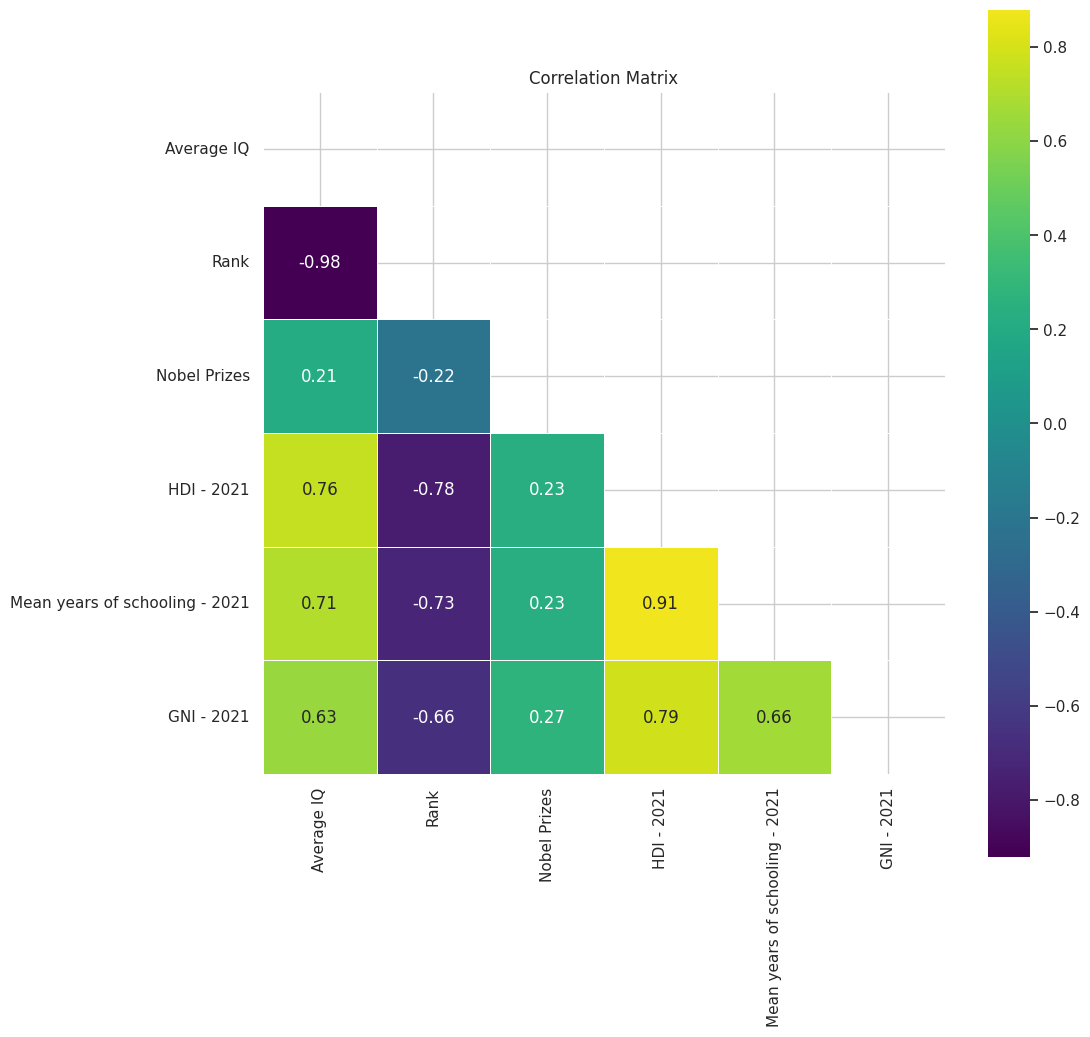

In [ ]:
selected_columns = df[['Average IQ','Rank', 'Nobel Prizes', 'HDI - 2021', 'Mean years of schooling - 2021', 'GNI - 2021', 'Population - 2023']]
selected_corr = selected_columns.corr()

plt.figure(figsize=(11, 11))
mask = np.triu(np.ones_like(selected_corr, dtype=bool))
sns.heatmap(selected_corr, mask=mask, robust=True, center=0, square=True, cmap="viridis", linewidths=0.6, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

- On remarque que Average IQ dépend fortement et positivement de HDI: Human Development Index et de MYS. Il dépend également de GNI: Gross National Income. Cette dépendance est également positive (Average IQ croit lorsque la variable croit) mais elle est moins importante.
- Cependant la matrice de correlation montre que les variables HDI et MYS sont fortement corrélées ( coeff de correlation 0.91) donc apportent quasiment la même information.
- On a choisit donc de représenter un graphiques à bulles de Average IQ, HDI et MYS où HDI et MYS représentent les axes et HDI le diamètre des bulles.


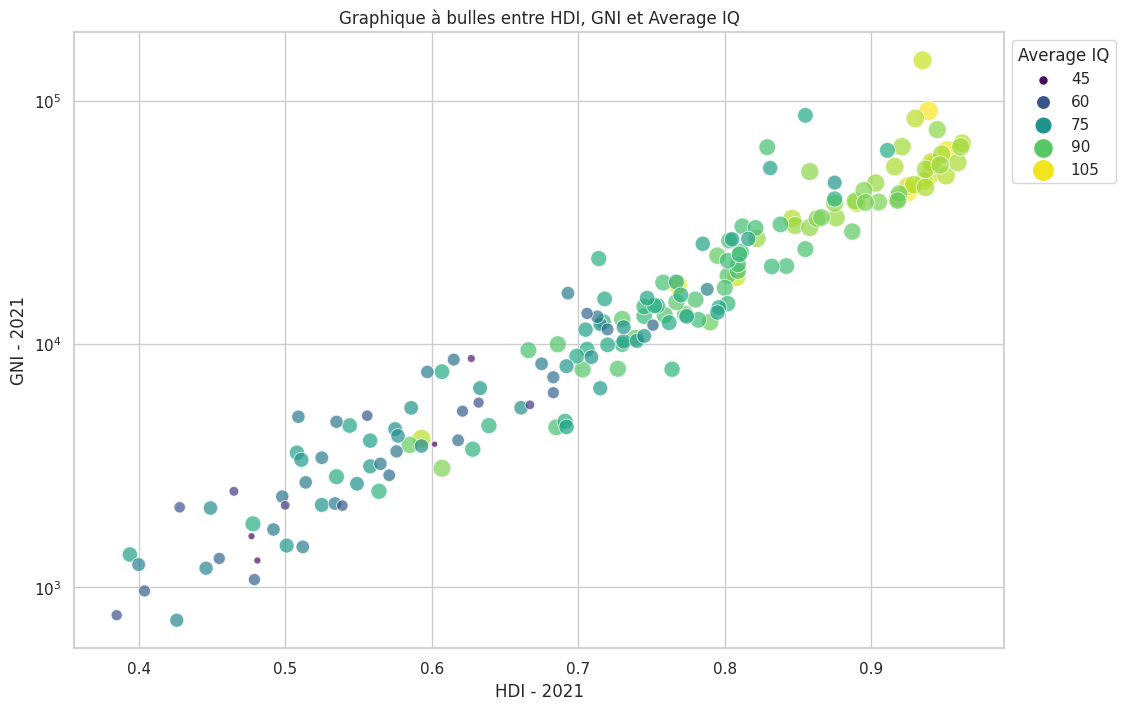

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un graphique à bulles avec Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x='HDI - 2021', y='GNI - 2021', size='Average IQ', data=df, sizes=(20, 200), hue='Average IQ', palette='viridis', alpha=0.7)

# Utiliser une échelle logarithmique sur l'axe y
plt.yscale('log')

# Ajouter un titre et des légendes
plt.title('Graphique à bulles entre HDI, GNI et Average IQ')
plt.xlabel('HDI - 2021')
plt.ylabel('GNI - 2021')
plt.legend(title='Average IQ', bbox_to_anchor=(1, 1))

# Afficher le graphique
plt.show()


On remarque que GNI dépend linéairement et positivement de HDI. La dépendance de Average IQ est plus forte avec HDI (une faible variation de 0.1 est significative) alors qu'avec GNI on parle d'une variation logarithmique.

# Bibliographie :
- https://www.kaggle.com/datasets/mlippo/average-global-iq-per-country-with-other-stats?select=avgIQpercountry.csv&fbclid=IwAR0uFIj6Uro-mcz68Rb0UA2pLh_DbhpbFXjJ2ELWliVbx1GR3_x_Y2N0zKQ
- https://www.kaggle.com/code/alkidiarete/avg-global-iq-with-eda-and-ridge-regression
- https://www.youtube.com/watch?v=u64sWJEP4S0&t=1408s